In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [30]:
test = pd.read_csv('test.csv',sep=";")
train = pd.read_csv('train.csv',sep=";")

df = pd.concat([test, train])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [34]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [36]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [38]:
df_num=df.select_dtypes(exclude='object')
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat=df_cat.apply(le.fit_transform)
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0


In [42]:
df=pd.concat([df_cat,df_num],axis=1)
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,10,1,0,0,0,0,0,10,3,0,30,1787,19,79,1,-1,0
1,7,1,1,0,1,1,0,8,0,0,33,4789,11,220,1,339,4
2,4,2,2,0,1,0,0,0,0,0,35,1350,16,185,1,330,1
3,4,1,2,0,1,1,2,6,3,0,30,1476,3,199,4,-1,0
4,1,1,1,0,1,0,2,8,3,0,59,0,5,226,1,-1,0


In [44]:
X=df.drop('y',axis=1)   #feature
y=df['y']   #target 

<Axes: >

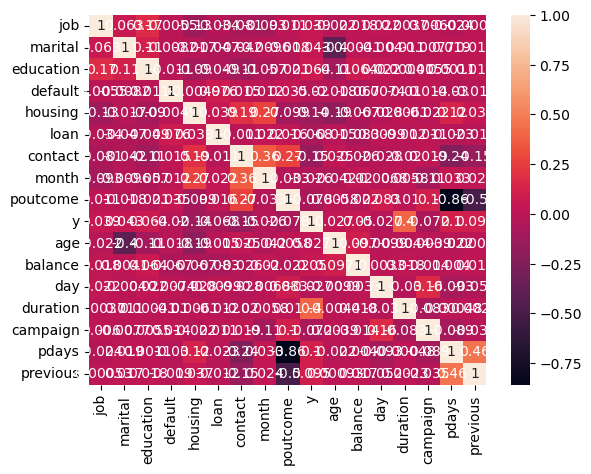

In [46]:
df.corr()
sns.heatmap(df.corr(),annot=True)

In [47]:
print(df['y'].value_counts())
print(df.shape)

y
0    43922
1     5810
Name: count, dtype: int64
(49732, 17)


In [50]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution in the balanced dataset
print(balanced_df['y'].value_counts())

y
0    43922
1    43922
Name: count, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39785, 16), (9947, 16), (39785,), (9947,))

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[8580,  194],
       [ 947,  226]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Print classification reports
print("Logistic Regression Model")
print(classification_report(y_test,y_pred))

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8774
           1       0.54      0.19      0.28      1173

    accuracy                           0.89      9947
   macro avg       0.72      0.59      0.61      9947
weighted avg       0.86      0.89      0.86      9947



In [69]:
# Compute AUC-ROC scores
rf_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

In [71]:
print(f"Logistic Regression AUC-ROC: {rf_auc:.4f}")


Logistic Regression AUC-ROC: 0.8092


High recall for class 0 (0.98) → The model is very good at identifying customers who will not subscribe.

Low recall for class 1 (0.19) → The model fails to correctly identify most customers who will subscribe.

F1-score for class 1 is 0.28, indicating poor performance on the positive class.